In [20]:
import pandas as pd

# Load the dataset into a pandas DataFrame
titanic = pd.read_csv('tested.csv')


In [21]:
# Display the first few rows of the DataFrame
print(titanic.head())



   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


# Data cleaning

In [22]:
# Identify missing values in the DataFrame
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
# Fill missing values in 'Age' column with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' column with the most common embarkation point
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# perform exploratory data analysis (EDA)

In [23]:
# Display the number of survivors by passenger class
print(titanic.groupby('Pclass')['Survived'].sum())


Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64


In [24]:

# Display the average age of survivors by passenger class
print(titanic.groupby('Pclass')['Age'].mean())


Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


In [25]:

# Display the number of survivors by sex
print(titanic.groupby('Sex')['Survived'].sum())


Sex
female    152
male        0
Name: Survived, dtype: int64


In [26]:

# Display the average fare paid by survivors by sex
print(titanic.groupby('Sex')['Fare'].mean())

Sex
female    49.747699
male      27.527877
Name: Fare, dtype: float64


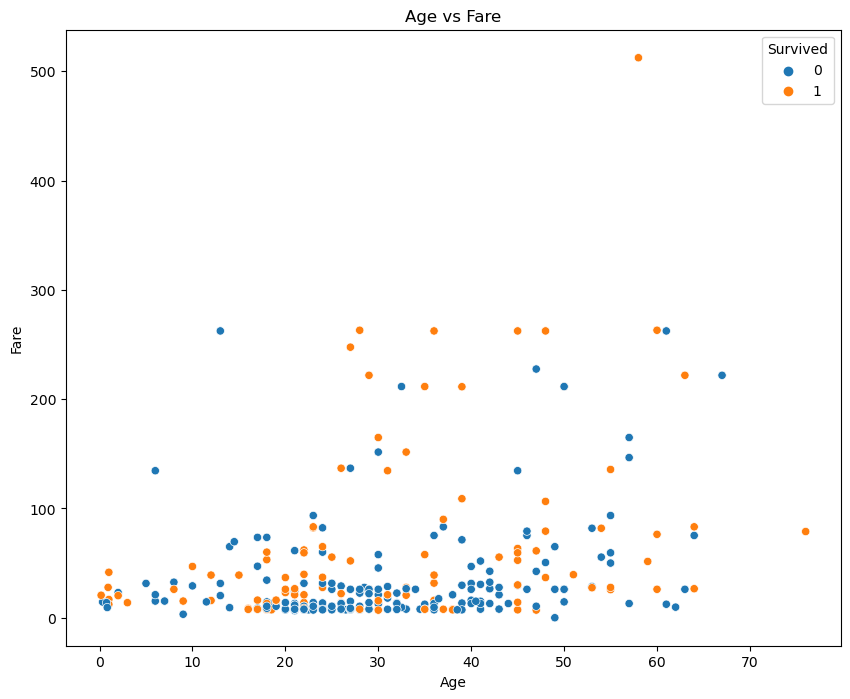

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between age and fare
plt.figure(figsize=(10, 8))
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare')
plt.show()

# split the dataset into a training set and a test set

In [28]:
# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)